# Математические пакеты. Лабораторная работа №2
Выполнил студент группы 9381 Птичкин Сергей.

### Задачи
1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса
3. Построить сонограмму по записи своего голоса.

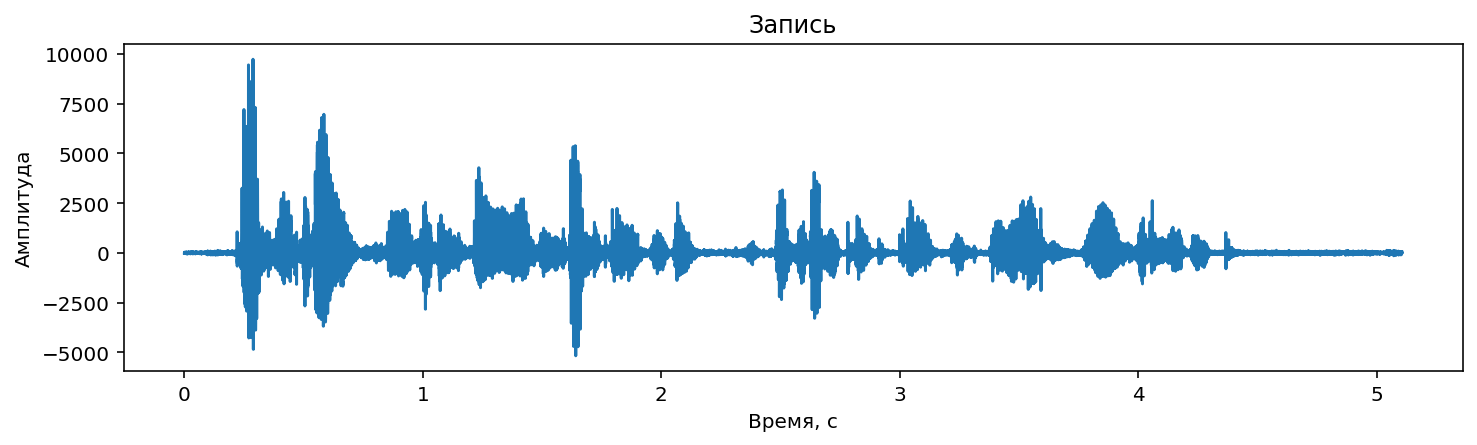

In [43]:
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import math
from scipy.io import wavfile
import more_itertools as mit

Fd, signal = wavfile.read("speech.wav", "r")
time = np.linspace(0, len(signal) / Fd, len(signal))
plt.figure(figsize=(12, 3))
plt.title("Запись")
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.plot(time, signal)
ipd.Audio('speech.wav')

In [33]:
dimension = 1024
spectr_resolution = round(Fd/dimension)
intervals = list(mit.windowed(signal, n=dimension, step=int(0.25*dimension)))
intervals[-1] = [i for i in intervals[-1] if i]
intervals = [i*np.hamming(len(i)) for i in intervals]

In [34]:
def DFT_slow(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

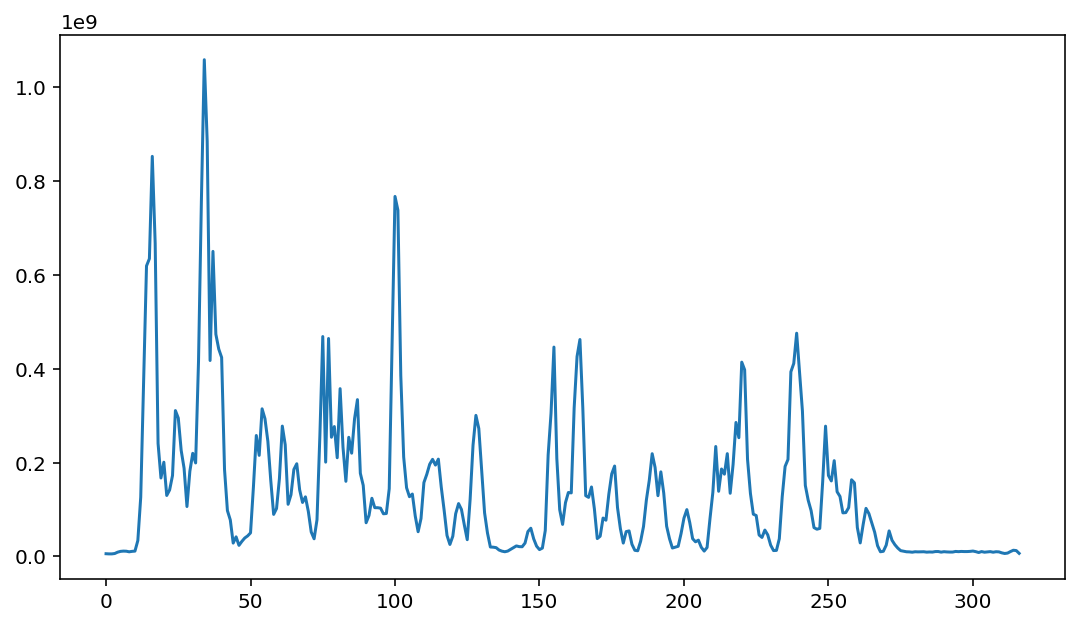

In [56]:
intervals = [DFT_slow(i) for i in intervals]
amplitude_spec = [sum([j**2 for j in i[:int(len(i)/2)]])**0.5 for i in intervals]
amplitude_spec = np.array([i.real for i in amplitude_spec])
plt.figure(figsize=(9, 5))
plt.plot(amplitude_spec)

#### Траектория основного тона.

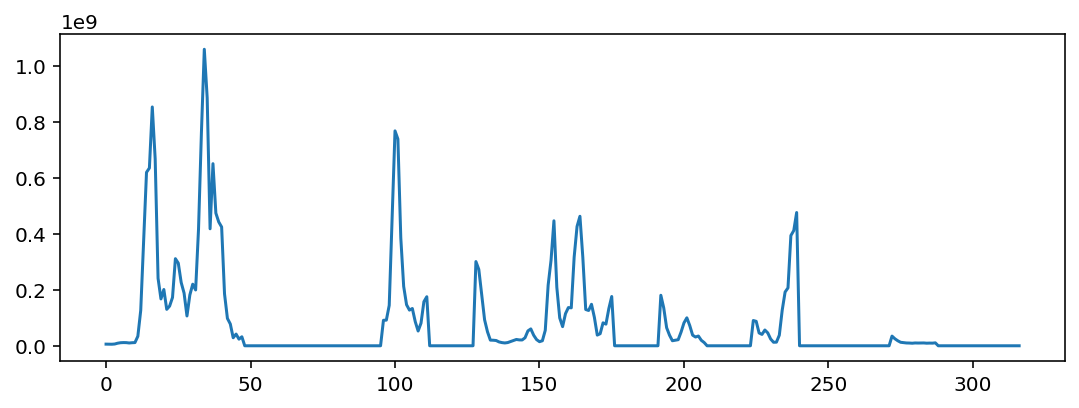

In [57]:
F0 = []
for i in list(mit.chunked(amplitude_spec, spectr_resolution)):
    segment = np.array(i)
    if segment.max() > 2.5*segment.mean():
        F0 += segment.tolist()
    else:
        F0 += [0 for i in range(len(segment))]
plt.figure(figsize=(9, 3))
plt.plot(F0)

#### Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса.

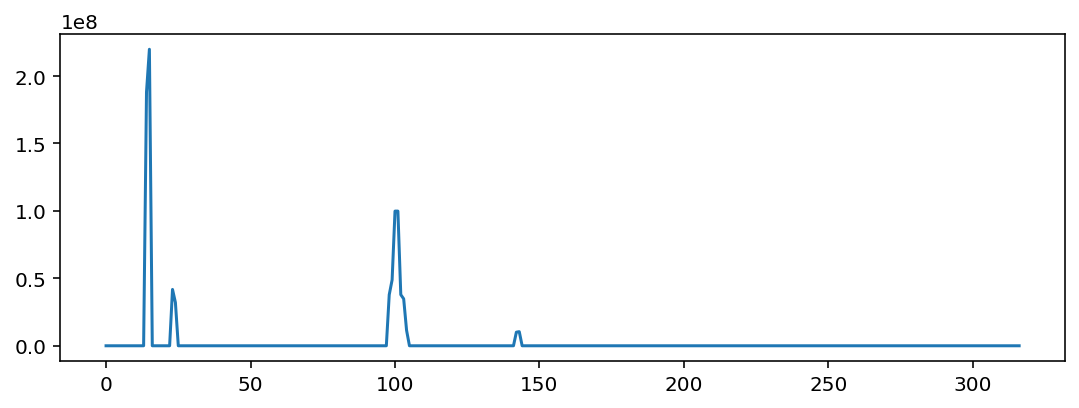

In [58]:
F1 = []
i = 0
while i < len(F0):
    try:
        inter_max = max([F0[2*i], F0[2*i-1], F0[2*i+1]])
        if F0[i] > 2*inter_max:
            F1.append(inter_max)
        else:
            F1.append(0)
    except:
        F1.append(0)
    i += 1
plt.figure(figsize=(9, 3))
plt.plot(F1)

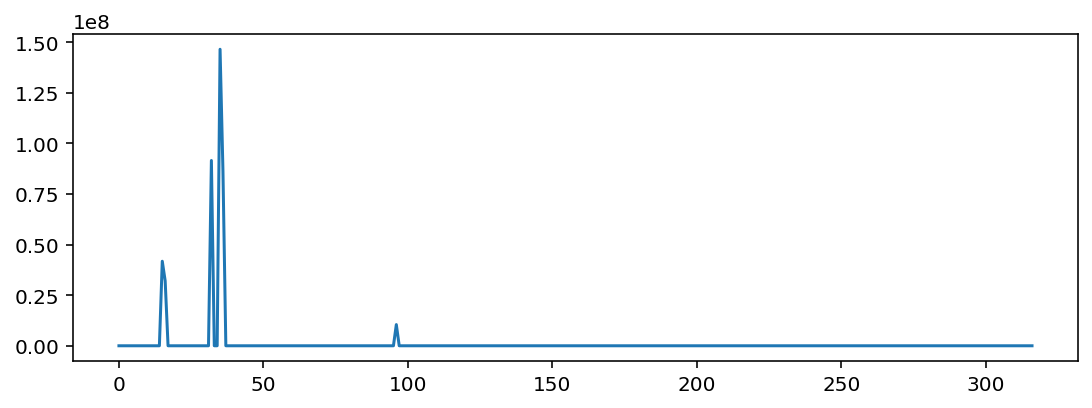

In [60]:
F2 = []
i = 0
while i < len(F0):
    try:
        inter_max = max([F0[3*i], F0[3*i-1], F0[3*i+1]])
        if F0[i] > 4*inter_max:
            F2.append(inter_max)
        else:
            F2.append(0)
    except:
        F2.append(0)
    i += 1
plt.figure(figsize=(9, 3))
plt.plot(F2)

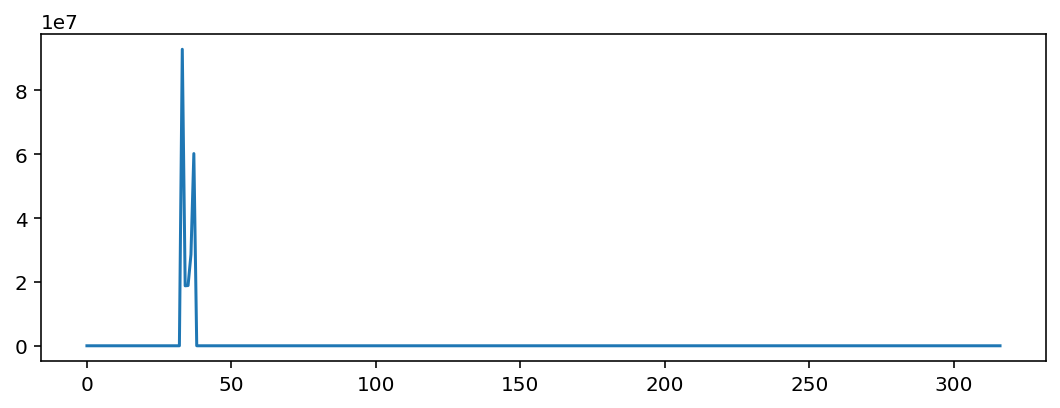

In [59]:
F3 = []
i = 0
while i < len(F0):
    try:
        inter_max = max([F0[4*i], F0[4*i-1], F0[4*i+1]])
        if F0[i] > 8*inter_max:
            F3.append(inter_max)
        else:
            F3.append(0)
    except:
        F3.append(0)
    i += 1
plt.figure(figsize=(9, 3))
plt.plot(F3)

#### Построить сонограмму по записи своего голоса.

In [73]:
matrix_amp = []

for i in range(0, len(amplitude_spec), spectr_resolution):
    seg = list(amplitude_spec[i:i+spectr_resolution])
    matrix_amp.append(seg)
matrix_amp = matrix_amp[:-2]
matrix_amp = np.array(matrix_amp)
matrix_amp.reshape(len(matrix_amp), len(matrix_amp[0]))
fig = px.imshow(matrix_amp)
fig.show()

#### Выводы.
Используя ДПФ были построены траектория основного тона, траектории второй, третьей и четвёртой формантных частот, а также сонограмма по записи собственного голоса.